
# *Car*

In [ ]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=355f824fe3542d52b9238ee856530abd7ffabd9134e50af63b96e35c82f330c8
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from scipy.stats import zscore
import statsmodels.api as sm

# pip install factor_analyzer
from factor_analyzer import FactorAnalyzer


a) Using k-means clustering on the psychographic questions (Q1-Q17) and the Ideal_Price
variable, identify and justify an appropriate number of attitudinal segments (less than 6) for new
car buyers (Hint: use the within-cluster sum of squares)

In [ ]:
np.random.seed(1234)
# Read the CSV file
car = pd.read_csv("./car_data.csv")
print(car.head())


   SurveyID  Purchase  Ideal_Price  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  \
0         1         0        58000   4   1   1   3   1   1   1   3   5    2   
1         2         1        43000   4   3   4   4   5   5   4   3   6    7   
2         3         1        39000   6   3   4   4   3   4   4   6   7    7   
3         4         1        45000   5   4   4   6   5   4   6   4   6    6   
4         5         1        38000   3   1   5   5   4   3   3   2   4    4   

   Q11  Q12  Q13  Q14  Q15  Q16  Q17  
0    3    2    1    4    7    7    7  
1    6    7    5    6    2    3    1  
2    4    5    7    7    3    5    2  
3    4    5    7    5    2    1    3  
4    5    6    5    5    2    1    2  


In [ ]:
car.shape

(824, 20)

In [ ]:
survqs = car.iloc[:, 2:20]
print(survqs.head())

   Ideal_Price  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Q11  Q12  Q13  Q14  \
0        58000   4   1   1   3   1   1   1   3   5    2    3    2    1    4   
1        43000   4   3   4   4   5   5   4   3   6    7    6    7    5    6   
2        39000   6   3   4   4   3   4   4   6   7    7    4    5    7    7   
3        45000   5   4   4   6   5   4   6   4   6    6    4    5    7    5   
4        38000   3   1   5   5   4   3   3   2   4    4    5    6    5    5   

   Q15  Q16  Q17  
0    7    7    7  
1    2    3    1  
2    3    5    2  
3    2    1    3  
4    2    1    2  


In [ ]:
# Extract survey questions
survqs = car.iloc[:, 2:20]
survqs= zscore(survqs)
# Revenue regression
X = car.drop(columns=['SurveyID', 'Purchase', 'Ideal_Price'])
X = sm.add_constant(X) #add intercept
y = car['Ideal_Price']
revreg = sm.OLS(y, X).fit()
print(revreg.summary())

                            OLS Regression Results                            
Dep. Variable:            Ideal_Price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     266.1
Date:                Tue, 15 Apr 2025   Prob (F-statistic):          1.84e-316
Time:                        22:27:43   Log-Likelihood:                -8198.4
No. Observations:                 824   AIC:                         1.643e+04
Df Residuals:                     806   BIC:                         1.652e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7189.5325    665.988    -10.795      0.0

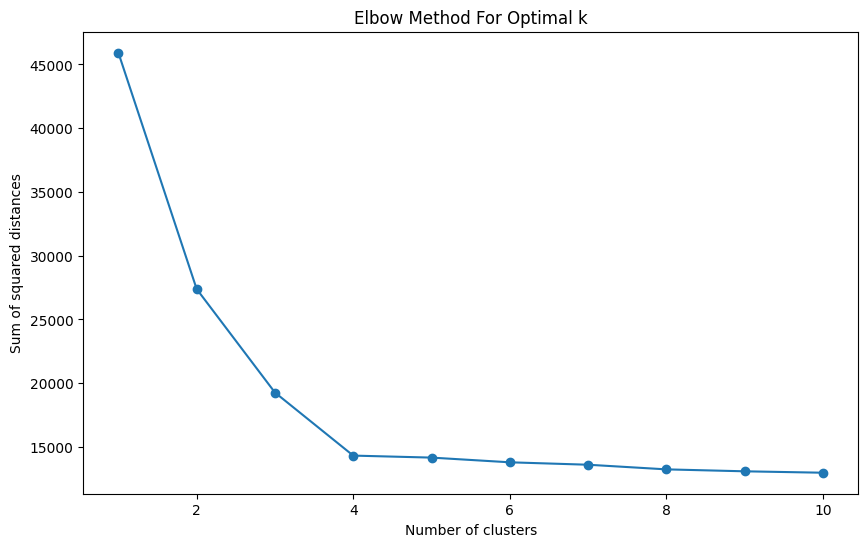

In [ ]:
sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(survqs)
    silhouette_avg = silhouette_score(survqs, cluster_labels)
    silhouette_scores[k] = silhouette_avg
for k, score in silhouette_scores.items():
    print(f'For n_clusters = {k}, the silhouette score is {score}')

For n_clusters = 2, the silhouette score is 0.3624451941569807
For n_clusters = 3, the silhouette score is 0.4067156171532735
For n_clusters = 4, the silhouette score is 0.4721872140389616
For n_clusters = 5, the silhouette score is 0.28480654601635474
For n_clusters = 6, the silhouette score is 0.2013194368707173
For n_clusters = 7, the silhouette score is 0.11327657397462841
For n_clusters = 8, the silhouette score is 0.10980977511079429
For n_clusters = 9, the silhouette score is 0.10845269971102181
For n_clusters = 10, the silhouette score is 0.10708336967622978


K= 4

In [ ]:
# Count number of respondents in each cluster
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k)
survqs['cluster'] = kmeans.fit_predict(car)
cluster_counts = survqs['cluster'].value_counts()
print(cluster_counts)


cluster
0    352
3    202
2    177
1     93
Name: count, dtype: int64


b) Describe each of the above segments by computing how many respondents are in each
segment, and by characterizing the mean of the question responses for each segments

In [ ]:
# Characterize the mean of the question responses for each segment
cluster_means = survqs.groupby('cluster').mean()
print("\nMean of the question responses for each segment:")
print(cluster_means)



Mean of the question responses for each segment:
         Ideal_Price        Q1        Q2        Q3        Q4        Q5  \
cluster                                                                  
0          -0.860303 -0.723660 -0.729922 -0.738512 -0.717625 -0.739920   
1           2.218367 -0.864872 -0.882056 -0.879684 -0.946322 -0.862848   
2           0.685968  0.603325  0.578643  0.582144  0.601652  0.604965   
3          -0.123256  1.130559  1.171009  1.181818  1.159007  1.156524   

               Q6        Q7        Q8        Q9       Q10       Q11       Q12  \
cluster                                                                         
0       -0.682792 -0.734028 -0.730884 -0.501551 -0.453934 -0.495057 -0.484079   
1       -0.974494 -0.914962 -0.918112  0.231304  0.069979  0.049340  0.239521   
2        0.593401  0.602236  0.620677  1.436343  1.414717  1.477465  1.445683   
3        1.118509  1.172641  1.152454 -0.491080 -0.480832 -0.454653 -0.533492   

              Q13 

# **Factor Analysis without Ideal Price**

In [ ]:
mydata = car.iloc[:, 3:20]
mydata.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17
0,4,1,1,3,1,1,1,3,5,2,3,2,1,4,7,7,7
1,4,3,4,4,5,5,4,3,6,7,6,7,5,6,2,3,1
2,6,3,4,4,3,4,4,6,7,7,4,5,7,7,3,5,2
3,5,4,4,6,5,4,6,4,6,6,4,5,7,5,2,1,3
4,3,1,5,5,4,3,3,2,4,4,5,6,5,5,2,1,2


In [ ]:
from scipy.stats import zscore
# PCA
pca = PCA()
X_pca = pd.DataFrame(pca.fit_transform(zscore(X.iloc[:, 3:]))) # zscore is (X - X.mean()) / X.std()

pca_summary = pd.DataFrame({
    "explained_variance_ratio": pca.explained_variance_ratio_,
    "cumulative_explained_variance": np.cumsum(pca.explained_variance_ratio_),
})
print(pca_summary.head())

   explained_variance_ratio  cumulative_explained_variance
0                  0.382043                       0.382043
1                  0.246505                       0.628548
2                  0.117651                       0.746199
3                  0.028134                       0.774333
4                  0.026970                       0.801303


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


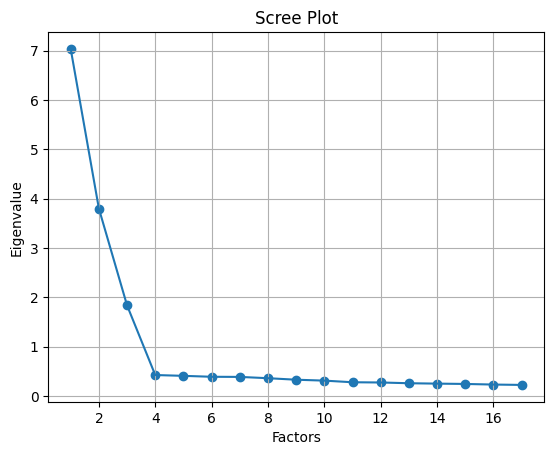

In [ ]:
# Determine Number of Factors to Extract
fa = FactorAnalyzer(rotation='varimax') # Set whether rotation and its type here
fa.fit(zscore(mydata))
fa.fit(mydata)
ev, v = fa.get_eigenvalues()
plt.scatter(range(1, mydata.shape[1] + 1), ev)
plt.plot(range(1, mydata.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

In [ ]:
# Extract (and rotate) factors

Nfacs = 3
fa = FactorAnalyzer(n_factors=Nfacs, rotation="varimax") # Set whether rotation and its type here

fa.fit(mydata) # Fit the factor model

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(rotation='varimax', rotation_kwargs={})

(17, 3)


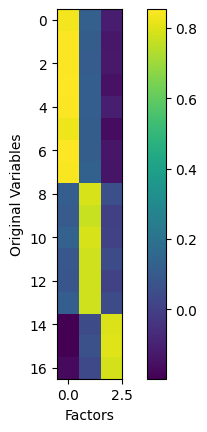

In [ ]:
loadings = fa.loadings_ #extract by fa.loadings
print(np.shape(loadings))
plt.imshow(loadings) #imshow: visualize in this figure
plt.xlabel('Factors')
plt.ylabel('Original Variables')
plt.colorbar()

In [ ]:
scores = fa.transform(mydata)
print(np.shape(scores))

(824, 3)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


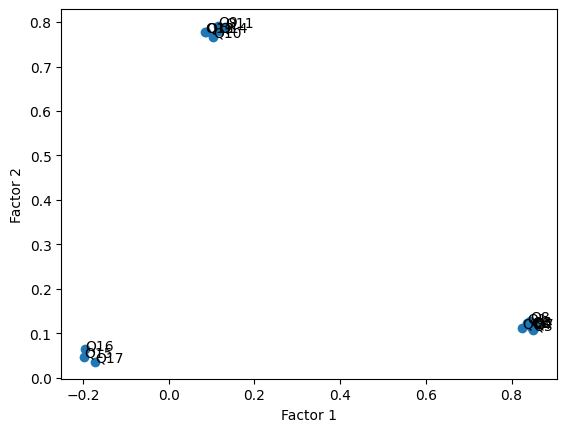

In [ ]:
# Plot factor loadings of the first two factors

fig, ax = plt.subplots()
ax.scatter(loadings[:, 0], loadings[:, 1])
for i, txt in enumerate(mydata.columns):
    ax.annotate(txt, (loadings[i, 0], loadings[i, 1]))
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.show()

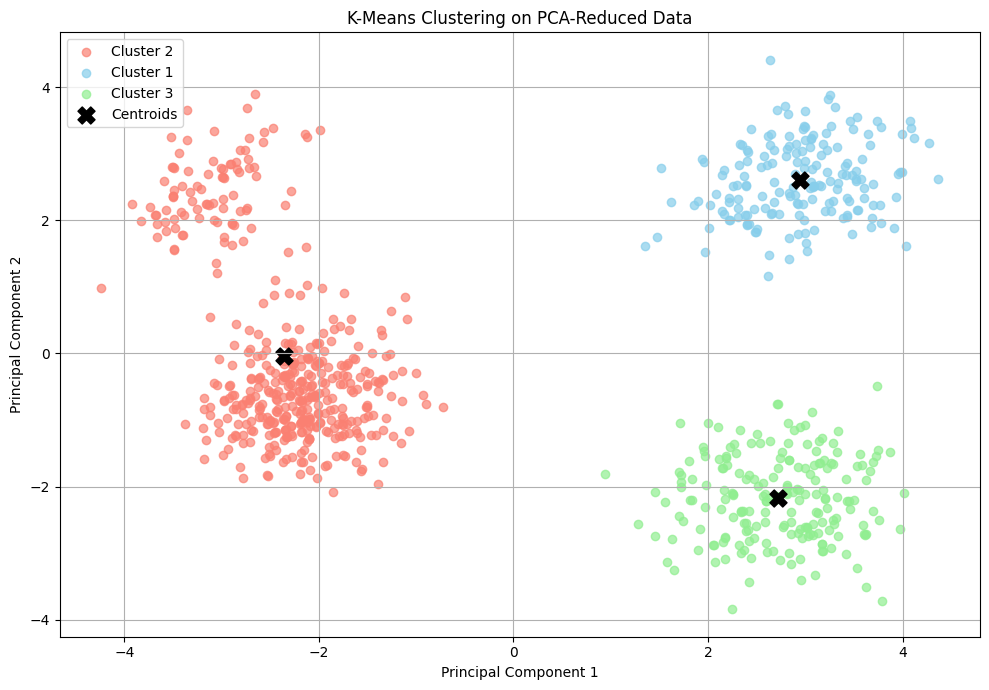

In [ ]:
# Standardize the data

scaled_data = zscore(mydata)

# Apply PCA (2 components for 2D plotting)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Apply KMeans clustering (you can change n_clusters as needed)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_data)

# Create a DataFrame with PCA and cluster labels
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Plot clusters
plt.figure(figsize=(10, 7))
colors = ['skyblue', 'salmon', 'lightgreen']
for cluster in pca_df['Cluster'].unique():
    cluster_points = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_points['PC1'], cluster_points['PC2'],
                label=f'Cluster {cluster+1}', alpha=0.7, color=colors[cluster])

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, marker='X', label='Centroids')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on PCA-Reduced Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
mydata.shape

(824, 17)

In [ ]:
loadings = fa.loadings_


In [ ]:
# Create a DataFrame with custom row and column names
loadings_df = pd.DataFrame(loadings.round(3),
                           index=mydata.columns,
                           columns=['Factor 1', 'Factor 2', 'Factor3'])
print(loadings_df)

     Factor 1  Factor 2  Factor3
Q1      0.836     0.123   -0.115
Q2      0.846     0.114   -0.130
Q3      0.850     0.108   -0.128
Q4      0.850     0.115   -0.148
Q5      0.848     0.118   -0.112
Q6      0.825     0.112   -0.165
Q7      0.854     0.113   -0.134
Q8      0.844     0.128   -0.138
Q9      0.116     0.791    0.060
Q10     0.104     0.767   -0.000
Q11     0.132     0.790    0.007
Q12     0.088     0.778    0.048
Q13     0.085     0.779    0.005
Q14     0.118     0.779    0.046
Q15    -0.198     0.047    0.798
Q16    -0.196     0.064    0.802
Q17    -0.172     0.036    0.788


In [ ]:
factor_names = ["Car Feature and Driving Experience", " Car Style and Personal Expression", "Emotional/Cultural Attachment"]
loadings_df.columns = factor_names
print(loadings_df)

     Car Feature and Driving Experience   Car Style and Personal Expression  \
Q1                                0.836                               0.123   
Q2                                0.846                               0.114   
Q3                                0.850                               0.108   
Q4                                0.850                               0.115   
Q5                                0.848                               0.118   
Q6                                0.825                               0.112   
Q7                                0.854                               0.113   
Q8                                0.844                               0.128   
Q9                                0.116                               0.791   
Q10                               0.104                               0.767   
Q11                               0.132                               0.790   
Q12                               0.088             

In [ ]:
fa.get_communalities()

array([0.72673398, 0.74560062, 0.75008457, 0.75771589, 0.74458977,
       0.7208447 , 0.76010143, 0.74758633, 0.64315096, 0.59929197,
       0.64108925, 0.61591563, 0.61371188, 0.62334209, 0.67887608,
       0.68552046, 0.65156235])